# Modern Portfolio Theory (Markowitz model)

### Contents
**[Question](#Question)**<br>
**[Background](#Background)**<br>
**[Source of data](#Source-of-data)**<br>
**[Analysing the data](#Analysing-the-data)**<br>
**[Simulation of portfolios](#Simulation-of-portfolios)**<br>
**[Optimization Method](#Optimization-Method)**<br>
**[Results](#Results)**<br>


## Question
One of the assumptions in financial modelling is that the returns of a security is a random variable. The standard deviation of the return is considered to be a measure of risk. The expected return should be higher for riskier securites and lower for safer securities. If we have several shares in a portfolio, is it possible to pick weights for the shares of the portfolio in such a way that the risk of the portfolio is smaller than risks of the individual shares? How to find the optimal portfolio which minimizes the risk while maximizing the returns of the portfolio? 

## Background
Let's consider a portfolio with $N$ securities.

* Portfolio value at time zero, $V(0)=\sum_{i=1}^N x_i S_i(0)$, where $x_i$ is the number of shares and $S_i(0)$ is the price of the security $i$.   
* Weights of the securities for the portfolio, $w_i=\frac{x_i S_i(0)}{V(0)}$ such that $\sum_{i=1}^N w_i=1$.  
* Return of the portfolio $R_p = \sum_{i=1}^N w_i R_i$, where $R_i$ is the return of security $i$.  
* Expected return of the portfolio $E(R_p)=\sum_{i=1}^N w_i E(R_i)$   
* Variance of the portfolio $Var(R_p)=E(R_p^2)-E(R_p)^2$  


The relationship between the log return (or continuously  compounded return) and the simple return is $r_t= log(1+R_t)$ or $R_t=e^{r_t}-1$. Log returns are more useful because  of the additivity of risks, which is explained below.    
* For multiperiod  ($k$ periods) returns,  $r_t[k]=r_t + r_{t-1} + \ldots + r_{t-k+1}$.
* $Var(r_t[k]) = Var(r_t) + Var(r_{t-1}) + \ldots + Var(r_{t-k+1})$. This holds true only when $r_i$ are independent.  

Expected log return of the portfolio $E(r_p) \approx \sum_{i=1}^N w_i E(r_i)$, for a portfolio with $N$ securities.   
Variance of the log-returns of the portfolio $Var(r_p)=E(r_p^2)-E(r_p)^2$, where $r_p = \sum_{i=1}^N w_i r_i$

## Source of data

In the following analysis, nine stocks (AXISBANK, DABUR, DRREDDY, ICICIBANK, INFY, RELIANCE, SBIN, SUNPHARMA and TCS) from NSE are considered. Historical data of these nine stocks are downloaded from [here](https://in.finance.yahoo.com). The data is stored in a folder named "data_2020_09_25".

In [1]:
#Importing necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Constants
# Starting and ending dates of historical data for our analysis
start_date = '2010-09-25'
end_date = '2020-09-25'
data_folder='data_2020_09_25' # this folder contains historical daily prices of stock of 10 companies
variable='Adj Close'
n_stocks=len(os.listdir(data_folder)) # number of securities

The following function reads the stock data from the folder 'data_2020_09_25' and returns a pandas dataframe

In [3]:
def get_stocks_data_from_folder(data_folder, variable, start_date, end_date):
    files_list=os.listdir(data_folder)
    df=pd.DataFrame()
    for filename in files_list:
        file_path=os.path.join(data_folder,filename)
        col_name=filename.replace('.NS.csv','')
        df[col_name]=read_stock_variable_from_CSV(file_path,variable,start_date, end_date)[variable]

    return df

def read_stock_variable_from_CSV(file_path,variable,start_date, end_date):
    data=pd.read_csv(file_path)
    data['Date'] = data['Date'].apply(pd.to_datetime)
    data.set_index('Date',inplace=True)
    mask = (data.index >= start_date) & (data.index <= end_date)
    return data.loc[mask][['Adj Close']]

We now read the daily Adj close prices of stocks from the folder 'data_2020_09_25' and save the data in a variable named 'data_adj_close'. Also, Nan values are removed.

In [4]:
data_adj_close=get_stocks_data_from_folder(data_folder, 'Adj Close', start_date, end_date)
#missing_values_count = data_adj_close.isnull().sum()
#print(missing_values_count)
data_adj_close.dropna(inplace=True)

## Analysing the data

In [5]:
data_adj_close

,AXISBANK,DABUR,DRREDDY,ICICIBANK,INFY,RELIANCE,SBIN,SUNPHARMA,TCS
Date,,,,,,,,,
2010-09-27,224.963867,93.935127,1370.616821,117.560905,160.808289,435.443329,152.465805,182.664948,351.578674
2010-09-28,224.687714,92.819534,1339.725098,117.097054,159.959854,430.400024,152.947586,184.960449,348.565552
2010-09-29,225.448975,94.202858,1339.679199,116.175087,160.726028,430.615540,153.187256,187.833389,348.830811
2010-09-30,229.359741,96.389496,1323.521851,117.334755,161.757233,425.550812,155.332382,189.697037,351.332367
2010-10-01,235.069107,97.326599,1362.859619,119.680252,164.496368,434.451904,156.851913,190.621811,364.465363
...,...,...,...,...,...,...,...,...,...
2020-09-18,443.350006,508.450012,5333.350098,369.549988,1002.150024,2305.699951,192.600006,523.349976,2449.899902
2020-09-21,423.350006,490.700012,5142.000000,350.700012,1009.900024,2255.850098,185.800003,503.649994,2465.300049
2020-09-22,412.000000,492.100006,5167.950195,354.399994,1007.500000,2211.149902,186.199997,508.850006,2522.949951


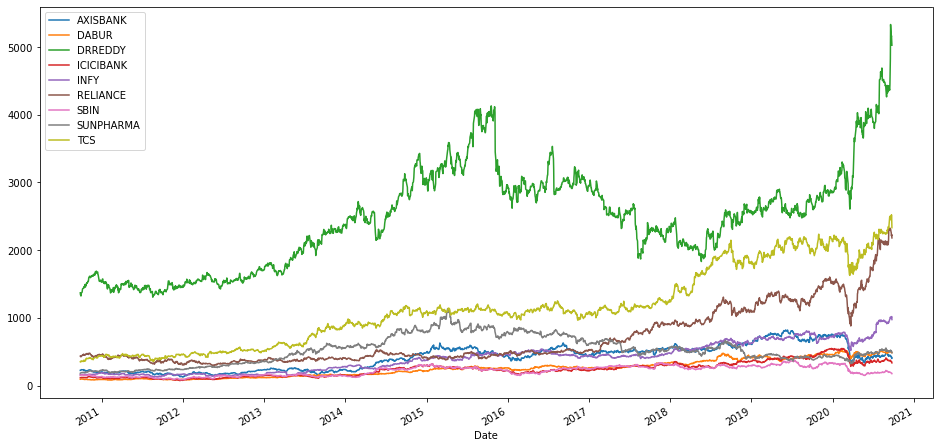

In [6]:
data_adj_close.plot(figsize=(16,8))

Since we will be using log returns in our analysis, they are calculated in the following step.

In [7]:
daily_returns= data_adj_close.pct_change(1)
daily_returns.dropna(inplace=True)
daily_logreturns=np.log(1+daily_returns)

The distribution of log-returns for nine stocks are shown below.

C:\Users\bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001883C591748>,
      dtype=object)

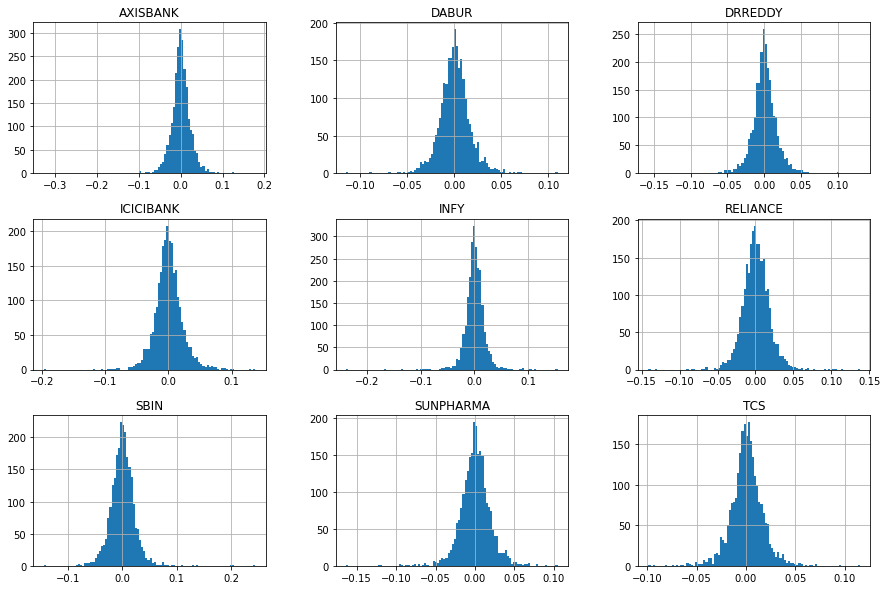

In [8]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
daily_logreturns.hist(ax = ax,bins=100)

print('Average returns over one full year:')
daily_logreturns.mean()*252 # per year

In [9]:
print('Covariance Matrix of the portfolio securities:')
daily_logreturns.cov()*252 # per year

Covariance Matrix of the portfolio securities:


,AXISBANK,DABUR,DRREDDY,ICICIBANK,INFY,RELIANCE,SBIN,SUNPHARMA,TCS
AXISBANK,0.141409,0.021379,0.016119,0.089238,0.024425,0.044105,0.078906,0.024168,0.019113
DABUR,0.021379,0.062896,0.013134,0.020514,0.011607,0.017356,0.017525,0.018457,0.009857
DRREDDY,0.016119,0.013134,0.073095,0.017746,0.012130,0.017910,0.015571,0.029341,0.009489
ICICIBANK,0.089238,0.020514,0.017746,0.121848,0.023538,0.043791,0.082593,0.023135,0.019609
INFY,0.024425,0.011607,0.012130,0.023538,0.086523,0.019029,0.019187,0.013533,0.037829
RELIANCE,0.044105,0.017356,0.017910,0.043791,0.019029,0.083581,0.041127,0.022409,0.019561
SBIN,0.078906,0.017525,0.015571,0.082593,0.019187,0.041127,0.133870,0.019984,0.014061
SUNPHARMA,0.024168,0.018457,0.029341,0.023135,0.013533,0.022409,0.019984,0.094950,0.012304
TCS,0.019113,0.009857,0.009489,0.019609,0.037829,0.019561,0.014061,0.012304,0.067860


## Simulation of portfolios

In the following section, 10000 portfolios are generated randomly. All these portfolios satisfy  the condition $\sum_{i=1}^N w_i=1$. These 10000 portfolios are shown on the risk-return plot along with their Sharpe ratio, where Sharpe ratio = $\frac{R_p-R_f}{\sigma_p}$, which is a measure of the risk-adjusted return. In this analysis, $R_f=0$ is considered. Higher the Sharpe ratio, better the portfolio.

In [10]:
def get_portfolio_return(weights, daily_logreturns):
    return np.sum(daily_logreturns.mean()*weights)*252 # per year - 252 trading days

def get_portfolio_variance(weights, daily_logreturns):
    return np.sqrt(np.dot(weights.T, np.dot(daily_logreturns.cov()*252,weights)))

def generate_porfolios_stats_randomly(daily_logreturns, n_portfolios):
    n_stocks=len(daily_logreturns.columns)
    pf_returns=[]
    pf_variances=[]
    
    for i in range(n_portfolios):
        weights=np.random.random(n_stocks)
        weights /= np.sum(weights)
        pf_returns.append(get_portfolio_return(weights, daily_logreturns))
        pf_variances.append(get_portfolio_variance(weights, daily_logreturns))
    
    pf_returns=np.array(pf_returns)
    pf_variances=np.array(pf_variances)
    return pf_returns, pf_variances

In [11]:
returns, variances = generate_porfolios_stats_randomly(daily_logreturns, 10000)

In [12]:
def plot_portfolios(pfreturns,pfvariances):
    plt.figure(figsize = (15,8))
    plt.scatter(pfvariances, pfreturns,c=pfreturns/pfvariances, marker='o' , edgecolor='black')
    plt.grid(True)
    plt.xlabel('Expected Variance')
    plt.ylabel('Expected Return')
    plt.colorbar(label= 'Sharp Ratio')
    plt.show()

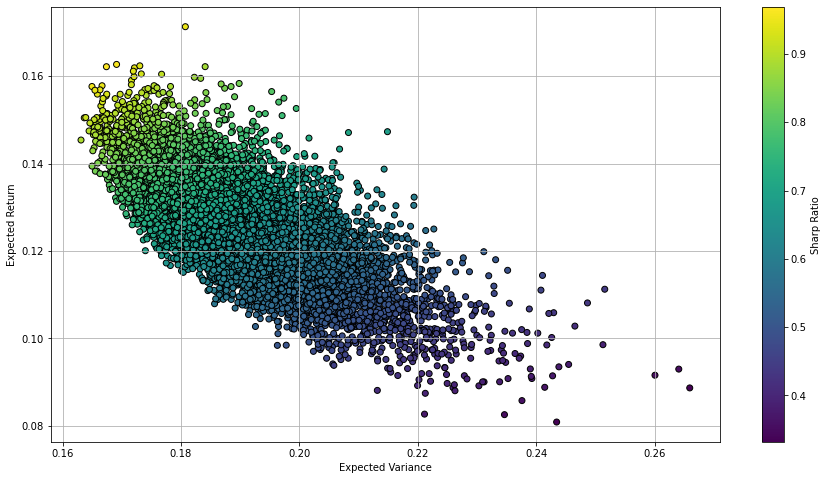

In [13]:
plot_portfolios(returns,variances)

## Optimization Method

In this section, a portfolio with the highest sharpe ratio is calculated from all the possible portfolios. This portfolio is also callled the optiaml portfolio.

In [14]:
def get_portfolio_stats(weights, daily_logreturns):
    pf_return=get_portfolio_return(weights, daily_logreturns)
    pf_variance=get_portfolio_variance(weights, daily_logreturns)
    return np.array([pf_return, pf_variance, pf_return/pf_variance])

def get_portfolio_sharp_ratio(weights, daily_logreturns):
    return -get_portfolio_stats(weights, daily_logreturns)[2]

from scipy.optimize import minimize
def optimize_portfolio(daily_logreturns):
    n_stocks=len(daily_logreturns.columns)
    bounds = tuple((0,1) for x in range(n_stocks))
    con=({'type':'eq','fun': lambda x: np.sum(x)-1})
    weights=np.random.random(n_stocks)
    weights /= np.sum(weights)
    optimum_pf=minimize(fun=get_portfolio_sharp_ratio, x0=weights, args=daily_logreturns, bounds=bounds, method='SLSQP', constraints=con)
    return optimum_pf

## Results

In [15]:
opt_pf=optimize_portfolio(daily_logreturns)

In [16]:
print('Weights of the optiaml portfolio: ')
for i in range(9):
    print(daily_logreturns.columns[i],opt_pf['x'][i].round(3))

Weights of the optiaml portfolio: 
AXISBANK 0.0
DABUR 0.298
DRREDDY 0.152
ICICIBANK 0.0
INFY 0.131
RELIANCE 0.129
SBIN 0.0
SUNPHARMA 0.0
TCS 0.29


In [17]:
# optimal portfolio statistics
opt_pf_stats=get_portfolio_stats(opt_pf['x'],daily_logreturns)
print('Expected return, Volatility and Sharp ratio:',opt_pf_stats)

Expected return, Volatility and Sharp ratio: [0.17205927 0.16732007 1.02832415]


In the below, the optimal portfolio is represented as star on the risk-return plot.

In [18]:
def plot_optimum_portfolios(pfreturns,pfvariances):
    plt.figure(figsize = (15,8))
    plt.scatter(pfvariances, pfreturns,c=pfreturns/pfvariances, marker='o' , edgecolor='black')
    plt.plot(opt_pf_stats[1],opt_pf_stats[0],'g*', markersize=20)
    plt.grid(True)
    plt.xlabel('Expected Variance')
    plt.ylabel('Expected Return')
    plt.colorbar(label= 'Sharp Ratio')
    plt.title("The optimal portfolio is shown as a star in green") 
    plt.show()

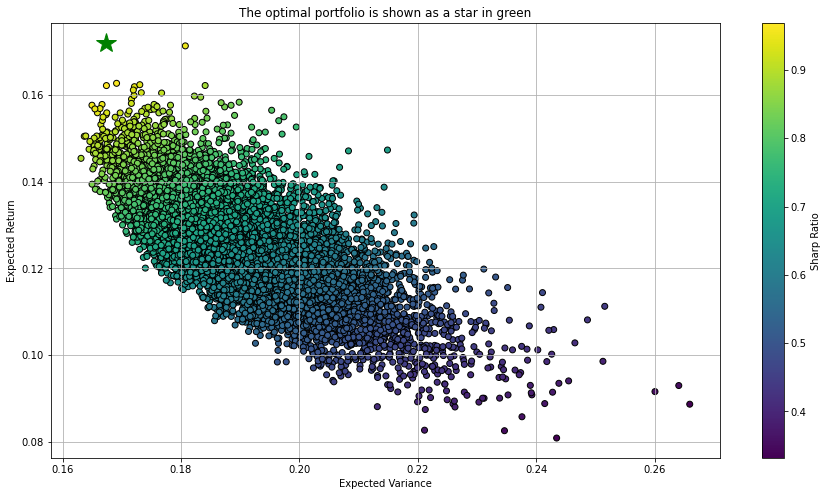

In [19]:
plot_optimum_portfolios(returns,variances)